In [47]:
import random

import matplotlib.pyplot as plt
import numpy as np
import mcu
import cylinder_dataset_generator as cyl
from importlib import reload

reload(mcu)
reload(cyl)

<module 'cylinder_dataset_generator' from '/Users/Ekaterina.Inkina/Documents/Workspace/manifold-learning/cylinder_dataset_generator.py'>

In [120]:
reload(cyl)
reload(mcu)
cylinder_num = 400
cylinder_point_cnt = 300
control_vars = cyl.get_control_vars(cylinder_num)
response_matrix = cyl.generate_array_of_cylinders(control_vars, noise_level=0.5, num_points=cylinder_point_cnt)
k = 2
c = 500
standardized_x, centered_y, edges, y_means, y_scaler, x_means, x_stds = mcu.prepare_data(control_vars, response_matrix, k)

In [121]:
q = mcu.solve_semidefinite_programming(standardized_x, centered_y, edges, c)

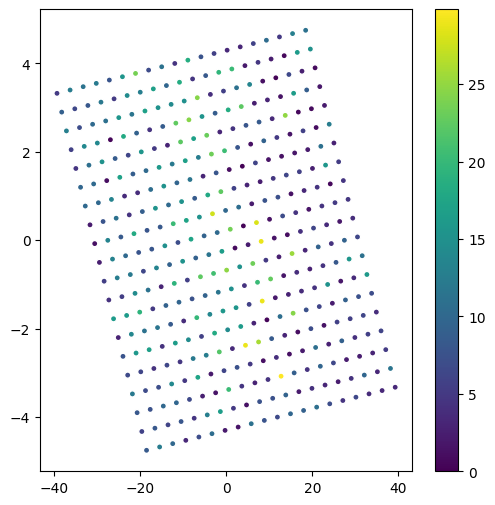

0.4467091969600551


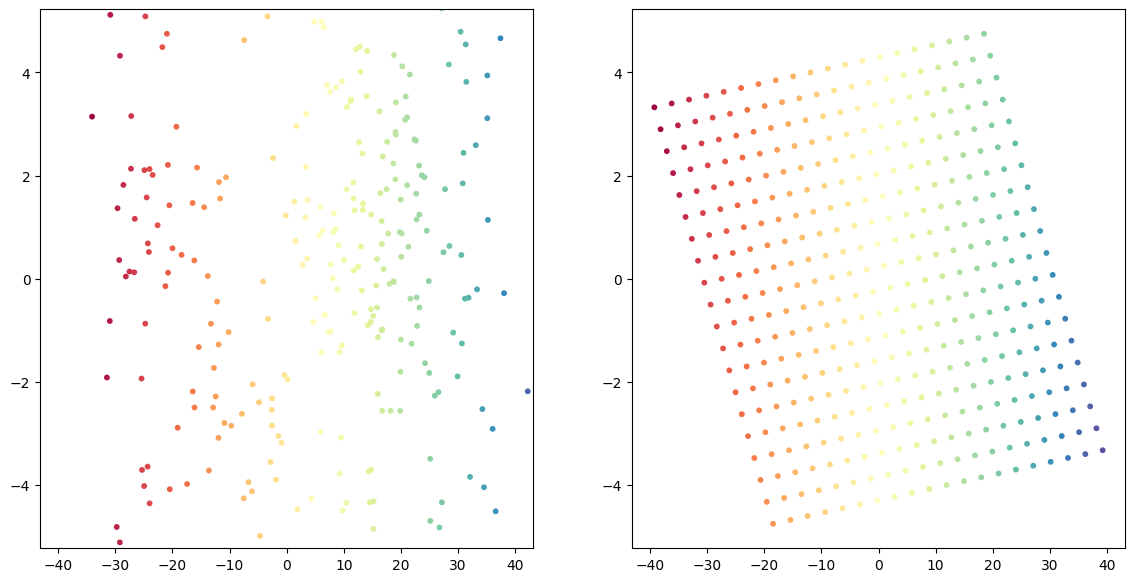

In [122]:

ld_embedding = mcu.reduce_dimensions(q)
regression_matrix = mcu.regress(ld_embedding, standardized_x)
reconstructed_y = np.dot(standardized_x, regression_matrix)

rre = mcu.compute_rre(ld_embedding, reconstructed_y)
mcu.plot_rre_heatmap(np.linalg.norm(ld_embedding - reconstructed_y, axis=1), reconstructed_y)
print(np.median(rre))
mcu.plot_two_embeddings(ld_embedding, reconstructed_y)

In [21]:
reload(cyl)
test_control_vars = cyl.get_random_control_vars(1000)
test_rolls = cyl.generate_array_of_cylinders(test_control_vars, noise_level=0.5, num_points=cylinder_point_cnt)
x_opts = []
for (roll, control_var) in zip(test_rolls, test_control_vars):
    x_opt, x_err = mcu.predictive_optimization(roll, centered_y, ld_embedding, regression_matrix, y_means, y_scaler, k)
    x_opt = x_opt * x_stds + x_means
    # x_err = 0
    # x_opt = (random.random()*10, random.random()*10)
    x_opts.append(x_opt)
    print("-----------")
    print(f"x_opt  = {x_opt}, x_err = {x_err}")
    print(f"x_real = {control_var}")

x_ops = np.array(x_opts)
test_control_vars = np.array(test_control_vars)

-----------
x_opt  = [8.52524194 8.63009838], x_err = 2.0008927206945155e-14
x_real = [8.94417008889683, 6.459725434719306]
-----------
x_opt  = [9.12801599 9.12801599], x_err = 38.56241041533502
x_real = [7.207795772360141, 8.557946020521044]
-----------
x_opt  = [5.57885903 5.30433306], x_err = 2.141945094860896e-14
x_real = [7.424382037634664, 2.436031197639913]
-----------
x_opt  = [7.53855942 9.12801599], x_err = 3.7658690550110685e-15
x_real = [9.29914503851691, 6.733486106079961]
-----------
x_opt  = [6.15264864 4.74567073], x_err = 5.1739489700992554e-14
x_real = [3.1275961399573426, 3.775251069863973]
-----------
x_opt  = [9.12801599 9.12801599], x_err = 447.7200000041283
x_real = [8.124185084900795, 9.669170909160314]
-----------
x_opt  = [1.87198401 1.87198401], x_err = 1335.189877836522
x_real = [9.335103087445626, 9.752683778641998]
-----------
x_opt  = [5.88619968 7.81333633], x_err = 2.31504379668954e-14
x_real = [0.23917708816879824, 6.51000793110038]
-----------
x_opt 

[ 2.21043423  2.00305403  3.41073463  2.97210953  3.17689423  1.14040569
 10.85373554  5.79547488  2.02213427  1.55216807  5.79434166  3.50429736
  5.97872966  3.80070463  0.46866509  2.27745521  4.00716381  2.42442274
  7.97437617  3.38946617  0.70907503  2.48604991  3.43564894  0.78289346
  3.10999295  2.10760219  1.63857622  6.7884544   3.0338755   3.55865945
  4.20105075  9.21017648  5.6140283   1.25697123  7.23279545  6.93843674
  4.15764318  4.12020322  6.64657552  2.33782416  0.85990597  2.72458359
  2.50218891  1.42756099  5.51237089  3.82947302  2.51147938  2.13038106
  2.62930075  1.96428885  3.53942046  2.33714214  4.63814014  2.93355934
  7.34460854  2.06559321  4.51409407  5.83521559  5.54948489  2.27575978
  3.93924248  3.58722405  3.50039836  1.17416093  1.24133169  5.31257793
  6.57810088  1.79661965  2.29501138  2.52899123  2.7766763   5.40652433
  2.67368673  2.29497502  2.58326428  1.74832487  3.6085273   2.73612227
  1.65052446  3.39375162  1.37293263  4.73122042  2

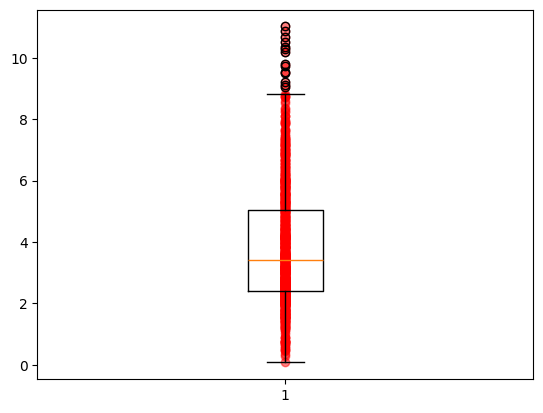

In [23]:
errors = np.linalg.norm(x_opts - test_control_vars, axis = 1)
plt.boxplot(errors)
plt.scatter(np.ones_like(errors), errors, alpha=0.5, color='red')
print(errors)
print(f"Median of errors = {np.median(errors)}")

In [42]:
mcu.k

3